> folium-- 기본지도 그리기, 기본지도 위에 마커 추가, heatmap, heatmap animation

# 강의영상 

<https://youtube.com/playlist?list=PLQqh36zP38-xfvS33ZQKsnKkf2H0n33gO>

# import 

In [1]:
import numpy as np
import pandas as pd
import folium
import folium.plugins

# folium 

- ref: [folium 공식홈페이지](https://python-visualization.github.io/folium/index.html#)

`-` Leaflet.js + Python $\to$ folium

- 데이터전처리: 파이썬이용
- 시각화: Leaflet.js 이용 

`-` Leaflet.js 란? 

- 지리정보시각화를 위해 개발된 자바스크립트 라이브러리 

`-` 이런 패키지특징: 사용방법을 익히기 어렵다. 

- 메뉴얼이 정리되어 있지 않음 

# folium: 기본지도 그리기

## `folium.Map()`

`-` global view 

In [4]:
folium.Map(scrollWheelZoom=False)

- 줌스크롤을 False 시키는 방법: `scrollWheelZoom=False`
- 이 옵션을 확인하려면? (1) 도움말 (2) [folium 공식홈페이지](https://python-visualization.github.io/folium/index.html#) (3) [Leaflet 공식홈페이지](https://leafletjs.com/index.html#map)

`-` location과 scale을 조정하는 방법

In [20]:
folium.Map(
    scrollWheelZoom=False,
    location = [35.8468,127.1294], # 분수대 
    zoom_start=20
)
# 35.8475,127.1305 # 자연대본관 
# 35.8468,127.1294 # 분수대 

`-` `tiles` 옵션을 주어서 지도의 외형을 변경하여 보자.

- `tiles="OpenStreetMap"`
- `tiles="Stamen Terrain"`, `tiles="Stamen Toner"`, `tiles="Stamen Watercolor"`
- `tiles="CartoDB positron"`, `tiles="CartoDB dark_matter"`

In [24]:
folium.Map(
    scrollWheelZoom=False,
    location = [35.8468,127.1294], # 분수대 
    zoom_start=15,
    tiles="CartoDB positron"
)
# 35.8475,127.1305 # 자연대본관 
# 35.8468,127.1294 # 분수대 

# folium: 기본지도 위에 마커 추가 

## `folium.Marker()`

`-` 마커생성

In [39]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.Marker(
    location = [35.8475,127.1305] # 자연대본관  
)
home = folium.Marker(
    location = [35.8368, 127.1118] # 집 
)
jbnu.add_to(m)
home.add_to(m)
m

`-` 마커에 팝업내용 추가

In [44]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.Marker(
    location = [35.8475,127.1305], # 자연대본관  
    popup = "JBNU"
)
home = folium.Marker(
    location = [35.8368, 127.1118], # 집 
    popup = "HOME",
    tooltip = "클릭해주세요"
)
jbnu.add_to(m)
home.add_to(m)
m

`-` 마커의 아이콘 변경

- `folium.Marker()`에서 `icon=folium.Icon(color='red',icon='university',prefix='fa')` 와 같은 식으로 옵션을 추가 
- icon='university' 대신에 `street-view','tree','plane','bell' 등을 추가할 수 있음. 
- 아이콘들은 [여기](https://getbootstrap.com/docs/3.3/components/) 참고. 'glyphicon glyphicon-" 부분을 제외한 문자열을 넣으면 된다. 

In [48]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.Marker(
    location = [35.8475,127.1305], # 자연대본관  
    icon=folium.Icon(color='red',icon='university',prefix='fa'),
    popup = "JBNU"
)
home = folium.Marker(
    location = [35.8368, 127.1118], # 집 
    popup = "HOME",
    tooltip = "클릭해주세요"
)
jbnu.add_to(m)
home.add_to(m)
m

`-` 마커의 팝업내용을 HTML로 넣기 (1)

- `"JBNU"` 대신에 `"<h2> JBNU </h2><br>"`
- `"HOME"` 대신에 `"<h5> HOME </h5><br>"`

In [51]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.Marker(
    location = [35.8475,127.1305], # 자연대본관  
    icon=folium.Icon(color='red',icon='university',prefix='fa'),
    popup = "<h2> JBNU </h2><br>"
)
home = folium.Marker(
    location = [35.8368, 127.1118], # 집 
    popup = "<h5> HOME </h5><br>",
    tooltip = "클릭해주세요"
)
jbnu.add_to(m)
home.add_to(m)
m

`-` 마커의 팝업내용을 HTML로 넣기 (2)

- 데이터프레임을 HTML로 바꾸어서 넣어보자. 

In [53]:
_df = pd.DataFrame({'year':[2019,2020,2021,2022], 'students':[35,30,33,26]})

In [58]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.Marker(
    location = [35.8475,127.1305], # 자연대본관  
    icon=folium.Icon(color='red',icon='university',prefix='fa'),
    popup = '<h2> JBNU </h2><br>' + _df.to_html()
)
home = folium.Marker(
    location = [35.8368, 127.1118], # 집 
    popup = "<h5> HOME </h5><br>",
    tooltip = "클릭해주세요"
)
jbnu.add_to(m)
home.add_to(m)
m

`-` 마커의 팝업내용을 HTML로 넣기 (3)

- 데이터프레임을 HTML로 바꾸어서 넣어보자. 
- 팝업시 크기를 조절할 수 있게 해보자. (`folium.IFrame`, `folium.Popup` 이용) 


In [61]:
_iframe = folium.IFrame('<h2> JBNU </h2><br>'+_df.to_html(),width=150,height=200)
_popup = folium.Popup(_iframe)

In [62]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.Marker(
    location = [35.8475,127.1305], # 자연대본관  
    icon=folium.Icon(color='red',icon='university',prefix='fa'),
    popup = _popup
)
home = folium.Marker(
    location = [35.8368, 127.1118], # 집 
    popup = "<h5> HOME </h5><br>",
    tooltip = "클릭해주세요"
)
jbnu.add_to(m)
home.add_to(m)
m

`-` 마커의 팝업내용을 HTML로 넣기 (4)

- 논리구조상 HTML 오브젝트를 아무거나 넣을 수 있음 $\to$ 그림도 넣을 수 있을까? 
- 그림파일을 HTML로 바꾸어서 넣어보자.

In [65]:
import matplotlib.pyplot as plt

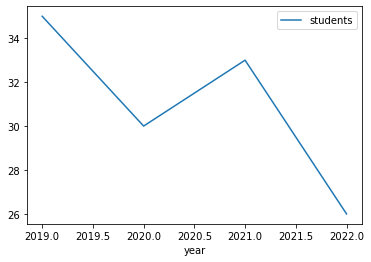

In [66]:
_df.plot.line(x='year',y='students')
fig = plt.gcf() 

In [69]:
fig.savefig('test.png') 

In [71]:
import base64

In [72]:
_encoded = base64.b64encode(open('test.png','rb').read())
_myhtml = '<img src="data:image/png;base64,{}">'.format
_iframe = folium.IFrame(_myhtml(_encoded.decode('UTF-8')),width=400,height=300)
_popup = folium.Popup(_iframe)

In [76]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.Marker(
    location = [35.8475,127.1305], # 자연대본관  
    icon=folium.Icon(color='red',icon='university',prefix='fa'),
    popup = _popup
)
home = folium.Marker(
    location = [35.8368, 127.1118], # 집 
    popup = "<h5> HOME </h5><br>",
    tooltip = "클릭해주세요"
)
jbnu.add_to(m)
home.add_to(m)
m

## `folium.CircleMarker()`

`-` 서클마커 생성 

In [79]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.CircleMarker(
    location = [35.8475,127.1305], 
    popup = "JBNU"
)
jbnu.add_to(m)
m

`-` 서클마커 색상 및 크기변경 

In [82]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.CircleMarker(
    location = [35.8475,127.1305], 
    popup = "JBNU",
    radius = 20,
    color='red'
)
jbnu.add_to(m)
m

`-` 서클마커 테두리 삭제 및 fill

In [86]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [35.8475,127.1305], # 자연대본관  
    zoom_start=14,
    tiles="CartoDB positron"
)
jbnu = folium.CircleMarker(
    location = [35.8475,127.1305], 
    popup = "JBNU",
    radius = 20,
    color=None,
    fill=True,
    fill_color='blue'
)
jbnu.add_to(m)
m

> 실제로는 라인, 사각형, 폴리곤등 좀 더 다양한 마커가 있다. folium으로 공간정보를 시각화할때는 마커를 그냥 지옴처럼 생각하고 시각화하는 경우가 많다. 그런데 하나의 지옴을 만드는데 너무 많은 노력이 들어가는 점이 단점

# folium: heatmap 

## `folium.plugins.HeatMap()`

`-` Heatmap은 폴리움에서 데이터 시각화를 하기에 적합한 기본도구임 

In [114]:
np.random.seed(43052)
data = np.random.multivariate_normal(mean=[28,77],cov=[[5,0],[0,5]],size=30)
data

array([[28.85735428, 79.42428788],
       [30.55532984, 77.68847119],
       [28.53170889, 77.79593099],
       [24.28125031, 73.90802517],
       [23.69144396, 73.67671933],
       [28.01548519, 76.92198975],
       [27.2317469 , 78.58527488],
       [24.53184497, 80.00897792],
       [27.87356664, 75.1436758 ],
       [24.72650472, 76.20709939],
       [27.23438418, 78.69678208],
       [32.97480623, 73.16060104],
       [31.55348967, 77.83018414],
       [29.72735877, 76.03486715],
       [29.72105093, 79.05284743],
       [26.98894987, 77.71250511],
       [29.82617838, 76.63020934],
       [30.53293541, 77.4658718 ],
       [24.23985514, 76.32658052],
       [29.39532886, 76.33151468],
       [27.43952815, 74.4129713 ],
       [25.10890152, 75.58970704],
       [26.43701446, 79.83294912],
       [29.88171925, 73.72508327],
       [27.62328548, 79.88574109],
       [28.81568439, 76.77756838],
       [26.14680892, 75.5387959 ],
       [28.15755534, 71.48729756],
       [31.11434115,

In [117]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [28,77],
    zoom_start=5
)
folium.plugins.HeatMap(data).add_to(m)
m

# folium: heatmap animation 

## `folium.plugins.HeatMapWithTime()`

In [118]:
np.random.seed(43052)
data1 = np.random.multivariate_normal(mean=[28,77],cov=[[5,0],[0,5]],size=20)
data2 = np.random.multivariate_normal(mean=[25,80],cov=[[5,0],[0,5]],size=20)
data3 = np.random.multivariate_normal(mean=[31,70],cov=[[5,0],[0,5]],size=20)
data = np.array([data1,data2,data3])

In [125]:
m = folium.Map(
    scrollWheelZoom=False,
    location = [28,77],
    zoom_start=5
)
folium.plugins.HeatMapWithTime(
    data.tolist(),
    index=['t1','t2','t3'], # time_index 
    radius=15,
).add_to(m)
m

## 예제: earthquakes 

### Step1: Pandas 정리

In [169]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv')
df

,Date,Latitude,Longitude,Magnitude
0,01/02/1965,19.2460,145.6160,6.0
1,01/04/1965,1.8630,127.3520,5.8
2,01/05/1965,-20.5790,-173.9720,6.2
3,01/08/1965,-59.0760,-23.5570,5.8
4,01/09/1965,11.9380,126.4270,5.8
...,...,...,...,...
23407,12/28/2016,38.3917,-118.8941,5.6
23408,12/28/2016,38.3777,-118.8957,5.5
23409,12/28/2016,36.9179,140.4262,5.9
23410,12/29/2016,-9.0283,118.6639,6.3


In [188]:
lst =[ 
    df.assign(Year = list(map(lambda x: x.split('/')[-1], df.Date)))\
    .assign(Year = lambda df: list(map(lambda x: x.split('-')[0] ,df.Year)))\
    .groupby('Year')\
    .pipe(list)[_year][1]\
    .loc[:,['Latitude','Longitude']]\
    .pipe(np.array).tolist()
    
    for _year in range(2016-1965+1) # 현장강의에서 실수한것 수정
]

- 현장강의에서 실수한것 수정 

### Step2: folium 

In [189]:
m=folium.Map(scrollWheelZoom=False)
folium.plugins.HeatMapWithTime(
    lst,
    radius=5,
    index=list(range(1965,2017)) # 현장강의에서 실수한것 수정
).add_to(m)
m

# 숙제

지진자료에서 1985년 이후의 자료만 고른뒤에 HeatMapWithTime()을 이용하여 시각화하라.